Import modules
===

In [1]:
# standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
from os import mkdir
from os.path import isdir, isfile

In [2]:
# custom package

# load the measurement schemes from the Benchmark
from shadowgrouping.measurement_schemes import Shadow_Grouping, Brute_force_matching, Derandomization, AdaptiveShadows, L1_sampler,  hit_by, DomClique
from shadowgrouping.measurement_schemes_Shadowupdate import Shadow_Grouping_Update, Shadow_Grouping_Update2, Shadow_Grouping_Update3, Shadow_Grouping_Update4, Priori, Posteriori, Shadow_Grouping_Update8, Shadow_Grouping_Update9, Shadow_Grouping_Update10, Shadow_Grouping_Update11, Shadow_Grouping_Update12, Shadow_Grouping_Update13
from shadowgrouping.measurement_schemes import SettingSampler as Overlapped_Grouping
from shadowgrouping.AEQuO import AEQuO
from shadowgrouping.AEQuODomClique import AEQuODomClique
from shadowgrouping.weight_functions import Inconfidence_bound, Bernstein_bound
# wrapper class to combine the measurement scheme with the respective outcomes
from shadowgrouping.energy_estimator import Energy_estimator, StateSampler, Sign_estimator, save_energy_estimations
# helper functions to load Hamiltonian decompositions
from shadowgrouping.measurement_schemes import setting_to_str
from shadowgrouping.hamiltonian import get_pauli_list, get_groundstate, char_to_int, int_to_char, mappings, load_pauli_list
import shadowgrouping.molecules as molecules
from shadowgrouping.benchmark import benchmark_empirical, benchmark_provable, save_dict, save_dict_provable

print(molecules.available_molecules)

['H2', 'H2_6-31g', 'LiH', 'BeH2', 'H2O', 'NH3']


C:\Users\aebad\AppData\Local\Temp\ipykernel_9632\915435042.py:15: NatureDeprecationWarning: The qiskit_nature.drivers.Molecule class is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the qiskit_nature.second_q.drivers.Molecule class.
  import shadowgrouping.molecules as molecules


Data I/O preparation
===

In [3]:
if not isdir("data/"):
    print("Data is zipped. Unzipping ...")
    !unzip -q data.zip
    print("Done!")

In [4]:
folder_Hamiltonians = "Hamiltonians/"
folder_OGM_settings = "OGM_probabilities/OGM_{}_{}{}.txt" # format string to fill in {molecule}x{qubit_number}x{mapping}
savepath = "generated_data/"
savename = "_molecule_{}_empirical.txt" # insert {mapping_name}

Molecule specifics
---

In [5]:
molecule_name = "LiH" # choose one out of the molecules above
mapping_name = "JW" # choose one out of ["JW","BK","Parity"]
basis_set = "sto3g" # choose one out of ["sto3g","6-31g"] - the latter only for H2 molecule

Algorithm / Benchmark specifics
---

In [6]:
eps = 0.1 # accuracy in Hartree
NUM_STEPS = 1000 # number of total measurement settings
N_runs = 100 # number of sampling repetitions for the same settings
N_plot = 30 # number of data points taken for fig4
delta = 0.33 # see caption of Figure 3 in manuscript
alpha_offset = 1e-3 # parameter for ShadowGrouping
UPPER_LIMIT_BRUTE_FORCE = 8 # in number of qubits

Ensure availability of folder
---

In [7]:
savename = molecule_name + savename
# create temporary folder for storing outputs
if not isdir(savepath):
    mkdir(savepath)

Figure 2 - Truncation criterion
===
No data is used for generating this plot and no data is produced.

In [8]:
!python3 demo_fig2.py

C:\Users\aebad\shadowgrouping\demo_fig2.py:40: SyntaxWarning: invalid escape sequence '\d'
  plt.xlabel('inconfidence level $\delta$',fontsize="x-large")
Traceback (most recent call last):
  File "C:\Users\aebad\shadowgrouping\demo_fig2.py", line 1, in <module>
    import numpy as np
ModuleNotFoundError: No module named 'numpy'


In [9]:
#display(Image(filename="generated_figures/fig2_demo.png"))

Table 1 - Empirical benchmark
===

In [10]:
# observables, w, offset, E_GS, state = load_pauli_list(folder_Hamiltonians,molecule_name,basis_set,mapping_name,verbose=True)
observables, w, offset, E_GS, state = load_pauli_list(folder_Hamiltonians,molecule_name,basis_set,mapping_name,verbose=True)
# wrap ground state <state> into StateSampler in order to retrieve samples in arbitrary
state_sampler = StateSampler(state)
# fill in format string for Overlapped Grouping probabilities
folder_OGM_settings = folder_OGM_settings.format(molecule_name,observables.shape[-1],mapping_name.lower())

# hyperparameters for ShadowGrouping, see eq. (48) in manuscript
#alpha = np.max(np.abs(w))/np.min(np.abs(w)) + alpha_offset
alpha = np.max(np.abs(w))/np.min(np.abs(w)) + np.min(np.abs(w))
#alpha = 1
#q = np.array([3, 0, 0, 0])
#p = np.array([0, 3, 0, 0])
#print(state)
#print(alpha)

Offset 		 -5.144773114778051
ZIIIIIIIIIII 	 1.0086846316246878
XXIIIIIIIIII 	 0.014737671428456535
YYIIIIIIIIII 	 0.014737671428456535
YZZZZYIIIIII 	 -0.0009023919840046625
XZZZZXIIIIII 	 -0.0009023919840046625
IYYIIIIIIIII 	 -0.007629887412396818
IXXIIIIIIIII 	 -0.007629887412396818
IYZZZYIIIIII 	 0.005924991455518412
IXZZZXIIIIII 	 0.005924991455518412
XZXIIIIIIIII 	 0.02555196278874628
	 ...


Max magnitude: 1.0086846316246887


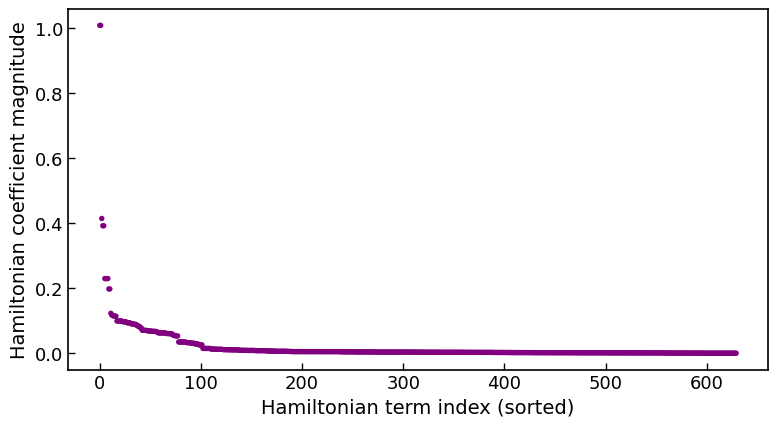

Plot saved to: generated_data/sorted_weights_scatter.png


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Example: assuming w is already defined (replace this line with your actual data)
# w = np.random.randn(500)  # Example placeholder

# ---------------------------
# Compute & sort magnitudes
# ---------------------------
magnitudes = np.abs(w).copy()
print("Max magnitude:", np.max(magnitudes))

sorted_magnitudes = np.sort(magnitudes)[::-1]

# ---------------------------
# Save path (same directory)
# ---------------------------
savepath = "generated_data/"
os.makedirs(savepath, exist_ok=True)
filename = os.path.join(savepath, "sorted_weights_scatter.png")

# ---------------------------
# Plot
# ---------------------------
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "axes.linewidth": 1.2,
})

fig, ax = plt.subplots(figsize=(8, 4.5))

# Scatter plot (purple dots)
ax.scatter(range(len(sorted_magnitudes)), sorted_magnitudes,
           color='purple', s=15, edgecolors='none')

#ax.set_yscale('log')

# Labels & style
ax.set_xlabel('Hamiltonian term index (sorted)', fontsize=14)
ax.set_ylabel('Hamiltonian coefficient magnitude', fontsize=14)
ax.tick_params(axis='both', which='both', direction='in', length=5, width=1)
ax.grid(False)  # cleaner look

plt.tight_layout()

# ---------------------------
# Save and show
# ---------------------------
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved to: {filename}")


In [12]:
pppp

NameError: name 'pppp' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Example x and y data (replace these with your actual values)
x = np.array([1, 10, 100, 1000, 10000, 30000, 50000 , 100000])
y = np.array([6568, 315, 173, 143, 145, 145 , 146 , 146])

# Make sure the folder exists
savepath = "generated_data/"
os.makedirs(savepath, exist_ok=True)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, marker='.', linestyle='-')
plt.xlabel('alpha')   # change label as needed
plt.ylabel('round number')   # change label as needed
plt.title('first round of measurement of all the observable')
plt.grid(True)
plt.yscale('log')
plt.xscale('log')
# Save the plot
filename = os.path.join(savepath, "fullmeasure.png")
plt.savefig(filename, dpi=300, bbox_inches='tight')

# Optional: display
plt.show()

print(f"Plot saved to: {filename}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Data ---
x = np.array([1, 10, 100, 1000, 10000, 30000, 50000, 100000])
y = np.array([6568, 315, 173, 143, 145, 145, 146, 146])

# Marked point
x_mark = 51733.57989694868
y_mark = 142

# Horizontal lines
y_obs = 630
y_cliques = 138

# --- Save path ---
savepath = "generated_data/"
os.makedirs(savepath, exist_ok=True)
filename = os.path.join(savepath, "fullmeasure_publication.png")

# --- Style setup ---
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "axes.linewidth": 1.2,
})

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y, marker='o', color='green', linewidth=1.8, markersize=6, label='Data')

# Mark and label the key point
ax.scatter(x_mark, y_mark, color='blue', zorder=5)
ax.annotate(
    r'$\alpha = \frac{h_{\max}}{h_{\min}} + h_{\min}$',
    xy=(x_mark, y_mark),
    xytext=(20, -50), textcoords='offset points',
    fontsize=13, color='blue',
    arrowprops=dict(arrowstyle='->', color='blue', lw=1)
)

# Horizontal reference lines
ax.axhline(y_obs, linestyle='--', color='gray', linewidth=1)
ax.axhline(y_cliques, linestyle='--', color='gray', linewidth=1)

# Labels near the y-axis
ax.text(x[0]*0.9, y_obs*1.02, "Number of observables = 630", color='gray', fontsize=13, va='bottom')
ax.text(x[0]*0.9, y_cliques*1.05, "Number of minimized cliques = 138", color='gray', fontsize=13, va='bottom')

# Axes settings
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Hyperparameter $\alpha$', fontsize=16)
ax.set_ylabel('Min number of rounds for $N_{hits} \\neq 0$ ', fontsize=16)
ax.tick_params(axis='both', which='both', direction='in', length=5, width=1)
ax.grid(False)

plt.tight_layout()
plt.savefig(filename, dpi=400, bbox_inches='tight')
plt.show()

print(f"Plot saved to: {filename}")


In [ ]:
# random states for shadow the random was 7.151858326476636 +- 0.05335939665893125
# for priori average RMSE 7.151002833534123 average STD 0.04898457087291026

# for posteriori average RMSE 7.145928339457254 average STD 0.04823436479512672

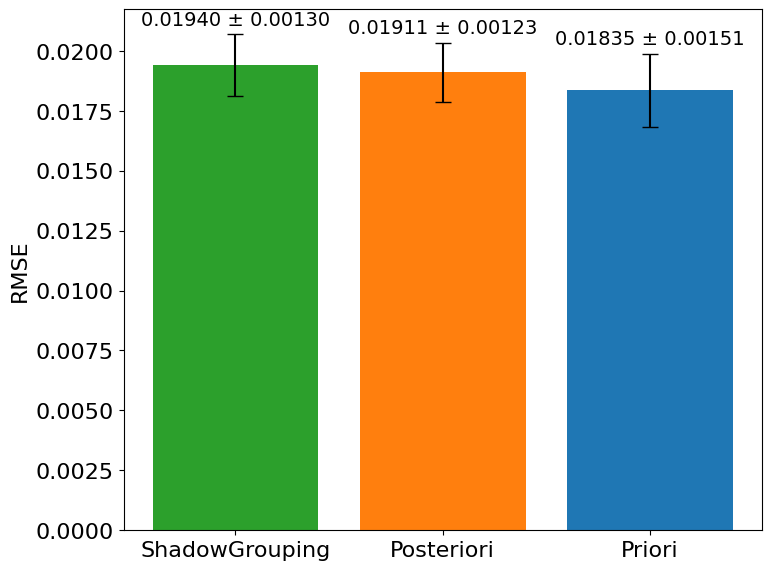

Plot saved to: generated_data/rmse_std_barplot_colored_nogrid_BeH2.png


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Data
methods = ["ShadowGrouping", "Posteriori", "Priori"]
rmse = np.array([0.019398169310547792, 0.019105120153262028, 0.018354499918910964])
std = np.array([0.0013012213808019802, 0.0012331479591555254, 0.0015118540742063275])

# Bar positions
x = np.arange(len(methods))

# Make sure the folder exists
savepath = "generated_data/"
os.makedirs(savepath, exist_ok=True)

# Color palette (green, orange, blue)
colors = ['#2ca02c', '#ff7f0e', '#1f77b4']

# Set global font size
plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
})

# Create plot
plt.figure(figsize=(8, 6))
bars = plt.bar(
    x, rmse, yerr=std, capsize=6, color=colors, edgecolor='none'
)

# Labels and ticks
plt.xticks(x, methods)
plt.ylabel("RMSE")

# Remove inner gridlines but keep outline
plt.grid(False)
plt.box(True)

# Add numerical values on top of bars
for i, (val, err) in enumerate(zip(rmse, std)):
    plt.text(i, val + err + 0.02 * max(rmse), f"{val:.5f} ± {err:.5f}",
         ha='center', fontsize=14)


# Layout and save
plt.tight_layout()
filename = os.path.join(savepath, "rmse_std_barplot_colored_nogrid_BeH2.png")
plt.savefig(filename, dpi=300, bbox_inches='tight')

# Show
plt.show()

print(f"Plot saved to: {filename}")


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Example data
# ---------------------------
data_txt = """

# METHOD: Posteriori
# Nshots: 1000
1	0.0
2	0.0
3	0.0
4	0.0
5	0.0
6	2.7525147528562144
7	3.053919366440624
8	0.0
9	0.9080744363565003
10	0.0
11	0.0
12	0.0
13	0.0
14	0.0
15	0.0
16	0.0
17	0.0
18	2.8445168215805907
19	0.965125303785868
20	0.03721552026433983
21	0.9568186774595091
22	1.2535590547936408
23	1.1011877814542785
24	0.35230983578308184
25	0.5955688791101963
26	0.8586608503545037
27	0.1647609424312506
28	0.6282478589783764
29	1.218168133324113
30	0.0
31	0.0
32	0.3666445286667255
33	0.0
34	0.0

"""

# ---------------------------
# Parse data
# ---------------------------
x, y = [], []
for line in data_txt.strip().splitlines():
    if line.startswith('#') or not line.strip():
        continue
    a, b = line.split()
    x.append(float(a))
    y.append(float(b))

x = np.array(x)
y = np.array(y)
zero_mask = (y == 0)

# ---------------------------
# Save path (same as RMSE bar plot)
# ---------------------------
savepath = "generated_data/"
os.makedirs(savepath, exist_ok=True)
filename = os.path.join(savepath, "posteriori_zero_points_log.png")

# ---------------------------
# Plot
# ---------------------------
plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "axes.linewidth": 1.2,
})

fig, ax = plt.subplots(figsize=(8, 4.5))

# Baseline
ax.axhline(0, color='0.85', linewidth=1)

# Nonzero points (solid green)
ax.scatter(x[~zero_mask], y[~zero_mask], s=10, color='orange',
           label='ShadowGrouping setting not chosen', zorder=3)

# Zero points (open red circles)
ax.scatter(x[zero_mask], np.zeros_like(x[zero_mask]), s=10, facecolors='none',
           edgecolors='green', linewidths=1.5,
           label='ShadowGrouping setting was chosen', zorder=4)

# Axis settings
ax.set_xlabel('Number of Measurement Rounds', fontsize=16)
ax.set_ylabel(r'Provable guarantee difference $\Delta \epsilon$', fontsize=16)
ax.set_yscale('symlog', linthresh=1e-5)  # <-- log scale with small linear region near 0
#ax.set_yscale('log')
ax.tick_params(axis='both', which='both', direction='in', length=5, width=1)
ax.grid(False)
ax.legend(frameon=False, loc='upper right')

plt.tight_layout()

# ---------------------------
# Save and show
# ---------------------------
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved to: {filename}")


In [ ]:
pppppp

In [ ]:
# initialization of all methods used in the benchmark. The order corresponds to the one in Table I from left to right
#methods = {}
#methods["ShadowGrouping"]     = Shadow_Grouping(observables,w,eps,Inconfidence_bound()()) #re-arrangement of observables based on highest weight
#methods["ShadowGrouping_Update"]     = Shadow_Grouping_Update(observables,w,eps,Inconfidence_bound()()) #re-arrangement of cliques around the heaviest node based on lowest SC and SW
#methods["ShadowGrouping_Update2"]     = Shadow_Grouping_Update2(observables,w,eps,Inconfidence_bound()()) #re-arrangement of cliques around the heaviest node based on highest overall weight
#methods["ShadowGrouping_Update3"]     = Shadow_Grouping_Update3(observables,w,eps,Inconfidence_bound()()) #first all cliques using DomClique then select heaviest clique in each round
#methods["ShadowGrouping_Update4"]     = Shadow_Grouping_Update4(observables,w,eps,Inconfidence_bound()()) #first all cliques using RepDomSet then select heaviest clique in each round
#methods["ShadowGrouping_Update5"]     = Shadow_Grouping_Update3(observables,w,eps,Inconfidence_bound()()) #first all cliques then overall weight using DomClique
#methods["ShadowGrouping_Update6"]     = Shadow_Grouping_Update6(observables,w,eps,Inconfidence_bound()()) #first all cliques using DomClique then select lowest SC and SW clique in each round
#methods["ShadowGrouping_Update7"]     = Shadow_Grouping_Update7(observables,w,eps,Inconfidence_bound()()) #re-arrangement of cliques based on lowest get_epsilon_Bernstein_no_restricted_validity
#methods["Derandomization"]           = Derandomization(observables,w,eps,use_one_norm=True)
#methods["RandomPaulis"]              = Derandomization(observables,w,eps,delta=1) # delta sets this method to random Paulis
#methods["AdaptivePaulis"]            = AdaptiveShadows(observables,w)
#methods["AEQuO"]                     = AEQuO(observables,w,offset,adaptiveness_L=2,interval_skewness_l=4,budget=NUM_STEPS) # values from figure 5 (L == adaptiveness_L +1)
#methods["AEQuODomClique"]            = AEQuODomClique(observables,w,offset,adaptiveness_L=2,interval_skewness_l=4,budget=NUM_STEPS) # values from figure 5 (L == adaptiveness_L +1)
# catch exception of missing data for OGM
#methods["DomClique"]                 = DomClique(observables,w)
#file = folder_OGM_settings.format(molecule_name,observables.shape[1],mapping_name.lower())
#if isfile(file):
#    methods["OverlappedGrouping"]    = Overlapped_Grouping(observables,w,file)
#print(methods)
method = Shadow_Grouping(observables,w,eps,Bernstein_bound(alpha=alpha)()) #original shadowgrouping
#method = Shadow_Grouping_Update(observables,w,eps,Bernstein_bound(alpha=alpha)()) #non sense
#method = Shadow_Grouping_Update2(observables,w,eps,Bernstein_bound(alpha=alpha)()) #best clique by highest weight
#method = Shadow_Grouping_Update3(observables,w,eps,Bernstein_bound(alpha=alpha)()) #based on DomClique and heaviest weight, no strategy for completing setting is required
#method = Shadow_Grouping_Update6(observables,w,eps,Bernstein_bound(alpha=alpha)()) #first find all cliques
#method = Shadow_Grouping_Update7(observables,w,eps,Bernstein_bound(alpha=alpha)()) #based on gaurantee, epsilon v1, shadowgrouping till Nhits != 0, select only cliques which lead to complete setting
#method = Shadow_Grouping_Update8(observables,w,eps,Bernstein_bound(alpha=alpha)()) #based on gauarntee, complete setting before finding the best clique in each round
#method = Shadow_Grouping_Update9(observables,w,eps,Bernstein_bound(alpha=alpha)()) #based on weight, complete setting before finding the best clique in each round#
#method = Shadow_Grouping_Update10(observables,w,eps,Bernstein_bound(alpha=alpha)()) #based on saving the cliques  generated by shadowgrouping itself
#method = Shadow_Grouping_Update11(observables,w,eps,Bernstein_bound(alpha=alpha)()) #based on saving the cliques  generated by shadowgrouping itself
#method = Shadow_Grouping_Update12(observables,w,eps,Bernstein_bound(alpha=alpha)()) #first find all valid settings then go through method  
#method = Shadow_Grouping_Update13(observables,w,eps,Bernstein_bound(alpha=alpha)()) #find clique cover greedily use it till Nhit != 0 

Initialize Estimator

In [ ]:
estimator = Energy_estimator(method,StateSampler(state),offset=offset)

Printing the number of observables

In [ ]:
print(len(observables))

Generating measurement scheme with N_rounds and printing number of occurrences of each setting

In [ ]:
estimator.reset()
N_rounds = 1000
estimator.propose_next_settings(N_rounds)
# version 1
#print(estimator.settings_dict)
print(estimator.settings)

plt.plot(estimator.measurement_scheme.rounds,estimator.measurement_scheme.eps_values_v3, label="v3")
plt.xlabel("Round")
plt.ylabel(r"$\epsilon$")
plt.title("Epsilon evolution over rounds")
plt.legend()
plt.grid(True)

# --- Save plot ---
save_dir = savepath + "epsilon_plots/"
if not isdir(save_dir):
    mkdir(save_dir)

# Clean method string for filename
clean_method = str(method).split('.')[-1].split(' ')[0].replace('<', '').replace('>', '')

plot_filename = save_dir + savename.format(clean_method).replace(".txt", "") + f"_Nshots={N_rounds}.png"

plt.savefig(plot_filename, dpi=150, bbox_inches="tight")  # High-quality image
print(f"Epsilon evolution plot saved to {plot_filename}")

plt.show()

In [ ]:
from collections import Counter

# Convert array of settings to readable strings
setting_strings = [estimator.state.index_to_string(row) for row in estimator.settings]

# Count frequency of each string (most will be 1)
settings_dict = dict(Counter(setting_strings))

print(settings_dict)

Printing the number of measurement rounds, total number of samples, number of observables, and number of samples per observable

In [ ]:
print('Total number of measurement rounds: ', estimator.num_settings)
print('Total number of distinct measurement settings: ', len(settings_dict))
N_samples = np.sum(np.array(estimator.measurement_scheme.N_hits))
print('Total number of samples across all observables: ', N_samples)
print('Total number of observables: ', len(observables))
print('Number of samples for each observable')
print(estimator.measurement_scheme.N_hits)

Determining number of observables without any sample

In [ ]:
print(len(np.where(estimator.measurement_scheme.N_hits == 0)[0]))

In [ ]:
import matplotlib.pyplot as plt
from os import mkdir
from os.path import isdir

# --- Filter settings with frequency >= 5 ---
filtered_settings = {k: v for k, v in settings_dict.items() if v >= 5}

# --- Sort by frequency (descending) ---
sorted_settings = dict(sorted(filtered_settings.items(), key=lambda item: item[1], reverse=True))

# --- Plot ---
plt.figure(figsize=(14, 6))
plt.bar(sorted_settings.keys(), sorted_settings.values(), color='skyblue')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Frequency")
plt.title(f"Measurement Settings Frequency (≥5 occurrences) for {savename.format(mapping_name).replace('.txt', '')}_N_rounds={N_rounds}")
plt.tight_layout()

# --- Save plot ---
# Ensure directory exists
if not isdir(savepath + "bargraph/"):
    mkdir(savepath + "bargraph/")

# Convert method to clean string for filename
clean_method = str(method).split('.')[-1].split(' ')[0].replace('<', '').replace('>', '')

# Build filename
plot_filename = savepath + "bargraph/" + savename.format(clean_method).replace(".txt", "") + f"_Nshots={NUM_STEPS}.png"

# Save before showing
plt.savefig(plot_filename, dpi=150, bbox_inches="tight")  # High-quality image
print(f"Measurement settings frequency saved to {plot_filename}")

# Optional: show plot after saving
plt.show()


Benchmarking all methods
---

In [ ]:
# all details can be found in benchmark.py
NUM_STEPS = 100 # number of total measurement settings
methods = {}
params = {}
params["use_naive"] = True # numerical necessity for compatability between AEQuO and the rest of the API
method = AEQuO(observables,w,offset,adaptiveness_L=2,interval_skewness_l=4,budget=NUM_STEPS) # values from figure 5 (L == adaptiveness_L +1)
label = AEQuO
results = {}
inconf_bound = {}  # Initialize before loop
Bern_bound = {}
#for label,method in method.items():
    #params = {"Nshots":NUM_STEPS, "Nreps": N_runs}
    #if label=="Brute-force":
        #if observables.shape[1] > UPPER_LIMIT_BRUTE_FORCE:
            #continue
    #elif label=="ShadowBernstein-truncated":
        #params["truncate_delta"] = delta # indicate to use the truncation criterion
    #elif label=="AEQuO":
        #params["use_naive"] = True # numerical necessity for compatability between AEQuO and the rest of the API
    #elif label=="AEQuODomClique":
        #params["use_naive"] = True # numerical necessity for compatability between AEQuO and the rest of the API
    #elif label=="DomClique":
        #continue
        #params["use_naive"] = True # numerical necessity for compatability between AEQuO and the rest of the API
rmse, std, _ = benchmark_empirical(method,offset,state_sampler,E_GS,params)
results[label] = (rmse,std)
print("Data for label <{}> generated.".format(label))
print(results)

    
    # Get last info dictionary by calling find_setting once more (verbose=False)
    #_, last_info = method.find_setting(verbose=False)
    #inconf_bound[label] = last_info["inconfidence_bound"]
    #print(f"Inconfidence Bound for <{label}>: {inconf_bound[label]}")
    #Bern_bound[label] = last_info["Bernstein bound"]
    #print(f"Bernstein Bound for <{label}>: {Bern_bound[label]}")
    # To check for DomClique specifically:
    #if "DomClique" in results:
    #    print(f"Data for DomClique: {results['DomClique']}")
    #else:
    #    print("No data found for DomClique.")

In [ ]:
# save data
# create temporary folder for storing outputs
if not isdir(savepath+"tab1/"):
    mkdir(savepath+"tab1/")
save_dict(savepath+"tab1/"+savename.format(mapping_name).replace(".txt","")+f"_Nshots={NUM_STEPS}.txt",results)
print("Empirical benchmark: data written to file")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data from results dictionary
methods = list(results.keys())
rmse_values = [val[0] for val in results.values()]  # Extract RMSE values
std_values = [val[1] for val in results.values()]   # Extract STD values

# Plot bar chart with error bars
plt.figure(figsize=(6, 4))
plt.bar(methods, rmse_values, yerr=std_values, capsize=5, color=['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta'])

# Add labels and title
plt.xlabel("Methods")
plt.ylabel("RMSE")
plt.title(f"RMSE-std for {savename.format(mapping_name).replace('.txt', '')}_Nshots={NUM_STEPS}")
plt.xticks(rotation=90)  # Rotate method names for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.draw()

# save data
# create temporary folder for storing outputs
if not isdir(savepath+"bargraph/"):
    mkdir(savepath+"bargraph/")
#formatted=savename.format(mapping_name)
#withouttxt=formatted.replace(".txt",".png")
plot_filename = savepath + "bargraph/" + savename.format(mapping_name).replace(".txt","")+f"_Nshots={NUM_STEPS}.png"
plt.savefig(plot_filename, dpi=150, bbox_inches="tight")  # High-quality image
print(f"Empirical benchmark: RMSE plot saved to {plot_filename}")




In [ ]:
methods_list = list(inconf_bound.keys())
values = [inconf_bound[m] for m in methods_list]

plt.figure(figsize=(6,4))
plt.bar(methods_list, values, color=['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta'])
plt.xlabel("Methods")
plt.ylabel("Inconfidence Bound")
plt.title("Inconfidence Bound per Method")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



Check outcomes
---
All previously generated data files can be easily accessed and displayed using the provided ```demo_*.py```-files
Using the ```-f <folder-name>``` option allows to look at the data generated and stored above.
If this option is left out, the data used for the manuscript is pulled up, instead

In [ ]:
!python3 demo_tab1.py -f generated_data/tab1/

Figure 4 - Provable benchmark
===

In [ ]:
savename = savename.replace("empirical","provable")
# this benchmark does not require knowledge about the GS or its energy
observables, w, offset, _, _ = load_pauli_list(folder_Hamiltonians,molecule_name,basis_set,mapping_name,verbose=True,diagonalize=False)
# fill in format string for Overlapped Grouping probabilities
folder_OGM_settings = folder_OGM_settings.format(molecule_name,observables.shape[-1],mapping_name.lower())

# hyperparameters for ShadowGrouping, see eq. (48) in manuscript
alpha = np.max(np.abs(w))/np.min(np.abs(w)) + alpha_offset
#print (np.abs(w))

In [ ]:
# initialization of all methods used in the benchmark. The order corresponds to the one in Table I from left to right
methods = {}
methods["ShadowDerandomization"]     = Shadow_Grouping(observables,w,eps,Inconfidence_bound()())
#methods["ShadowBernstein"]           = Shadow_Grouping(observables,w,eps,Bernstein_bound(alpha=alpha)())
# its truncated version is already included in the benchmark method
#methods["AdaptivePaulis"]            = AdaptiveShadows(observables,w)
# catch exception of missing data for OGM
file = folder_OGM_settings.format(molecule_name,observables.shape[1],mapping_name.lower())
if isfile(file):
    #methods["OverlappedGrouping"]    = Overlapped_Grouping(observables,w,file)
    #methods["DomClique"]             = DomClique(observables,w)

Benchmarking all methods
---

In [ ]:
# all details can be found in benchmark.py
results = {}
for label,method in methods.items():
    params = {"Nshots":NUM_STEPS, "Nreps": N_runs, "Nsteps": N_plot}
    if label=="ShadowBernstein":
        params["truncate"] = True # indicate to use the truncation criterion
        Nsteps, epsilons, epsilons_truncated = benchmark_provable(method,delta,params)
        results[label+"-truncated"] = epsilons_truncated
        print("Data for label <{}-truncated> generated.".format(label))
    else:
        Nsteps, epsilons = benchmark_provable(method,delta,params)
    results[label] = epsilons
    print("Data for label <{}> generated.".format(label))

In [ ]:
# save data
# create temporary folder for storing outputs
if not isdir(savepath+"fig4/"):
    mkdir(savepath+"fig4/")
save_dict_provable(savepath+"fig4/"+savename.format(mapping_name),results,Nsteps)
print("Provable benchmark: data written to file")

Check outcomes
---
All previously generated data files can be easily accessed and displayed using the provided ```demo_*.py```-files
Using the ```-f <folder-name>``` option allows to look at the data generated and stored above.
If this option is left out, the data used for the manuscript is pulled up, instead

In [ ]:
!python3 demo_fig4.py -f generated_data/fig4/

In [ ]:
display(Image(filename="generated_figures/fig4_demo_{}.png".format(molecule_name)))

Note: if you only see one of three subplots filled, run the above code for ```mapping_name = "JW", "BK", "Parity"```

In [ ]:
!python3 demo_fig5.py

In [ ]:
display(Image(filename="generated_figures/fig5_demo.png"))